## **Downloading the file into colab .**

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
dest_path='content/eye_gender_data.zip',
unzip=True)

Unzipping...Done.


# **Loading all the libraries into the colab notebook**

In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from PIL import Image

In [ ]:
labels = pd.read_csv("/content/content/eye_gender_data/Training_set.csv") # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data.append([new_img_array, train_data['label'][i]])

In [ ]:
train_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/content/eye_gender_data/train/Image_1...,male
1,Image_2.jpg,/content/content/eye_gender_data/train/Image_2...,female
2,Image_3.jpg,/content/content/eye_gender_data/train/Image_3...,female
3,Image_4.jpg,/content/content/eye_gender_data/train/Image_4...,female
4,Image_5.jpg,/content/content/eye_gender_data/train/Image_5...,male


In [ ]:
train_data=train_data.drop('filename',axis=1)

In [ ]:
X_train, X_test = train_test_split(train_data,test_size=0.2,random_state=23)

In [ ]:
X_train.head()

,filepaths,label
1449,/content/content/eye_gender_data/train/Image_1...,female
880,/content/content/eye_gender_data/train/Image_8...,female
6242,/content/content/eye_gender_data/train/Image_6...,female
5987,/content/content/eye_gender_data/train/Image_5...,female
7878,/content/content/eye_gender_data/train/Image_7...,female


In [ ]:
X_test

,filepaths,label
4607,/content/content/eye_gender_data/train/Image_4...,male
4014,/content/content/eye_gender_data/train/Image_4...,male
8341,/content/content/eye_gender_data/train/Image_8...,male
8522,/content/content/eye_gender_data/train/Image_8...,female
4109,/content/content/eye_gender_data/train/Image_4...,female
...,...,...
2277,/content/content/eye_gender_data/train/Image_2...,female
2938,/content/content/eye_gender_data/train/Image_2...,male
131,/content/content/eye_gender_data/train/Image_1...,male
2385,/content/content/eye_gender_data/train/Image_2...,male


In [ ]:
LE = LabelEncoder() #Using labelencoder transform the catergorical values to numerical values

y_test = LE.fit_transform(X_test["label"])
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training Dataset:')
print(f'Number of images: {X_train.shape[0]}')
print(f'Number of images with male eyes: {X_train["label"].value_counts()[0]}')
print(f'Number of images with female eyes: {X_train["label"].value_counts()[1]}\n')

# Viewing data in test dataset
print('Test Dataset:')

print(f'Number of images: {X_test.shape[0]}')

print(f'Number of images with male eyes: {X_test["label"].value_counts()[0]}')
print(f'Number of images with female eyes: {X_test["label"].value_counts()[1]}\n')

Training Dataset:
Number of images: 7376
Number of images with male eyes: 4027
Number of images with female eyes: 3349

Test Dataset:
Number of images: 1844
Number of images with male eyes: 1031
Number of images with female eyes: 813



# **Data Preprocessing that is convering into 0s and 1s and also converting to the desired shape and size.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
print("Preparing the training dataset ...")
training_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "filepaths",
    y_col = "label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

print("Preparing the validation dataset ...")
validation_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "filepaths",
    y_col = "label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

print("Preparing the test dataset ...")
test_set = test_datagen.flow_from_dataframe(
    dataframe = X_test,
    x_col = "filepaths",
    y_col = "label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    shuffle = False,
    batch_size = 32)

print('Data generators are ready!')

Preparing the training dataset ...
Found 6639 validated image filenames belonging to 2 classes.
Preparing the validation dataset ...
Found 737 validated image filenames belonging to 2 classes.
Preparing the test dataset ...
Found 1844 validated image filenames belonging to 2 classes.
Data generators are ready!


In [ ]:
print("Training: ")
print(training_set.class_indices)
print(training_set.image_shape)
print("---" * 8)
print("Validation: ")
print(validation_set.class_indices)
print(validation_set.image_shape)
print("---" * 8)
print("Test: ")
print(test_set.class_indices)
print(test_set.image_shape)

Training: 
{'female': 0, 'male': 1}
(75, 75, 3)
------------------------
Validation: 
{'female': 0, 'male': 1}
(75, 75, 3)
------------------------
Test: 
{'female': 0, 'male': 1}
(75, 75, 3)


# **Using early callbacks**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cb = [EarlyStopping(monitor = 'loss', mode = 'min', patience = 15, restore_best_weights = True)]

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), input_shape = (75, 75, 3), activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(SpatialDropout2D(0.2))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 1, activation = 'sigmoid'))

print(cnn.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 15, 15, 64)        0

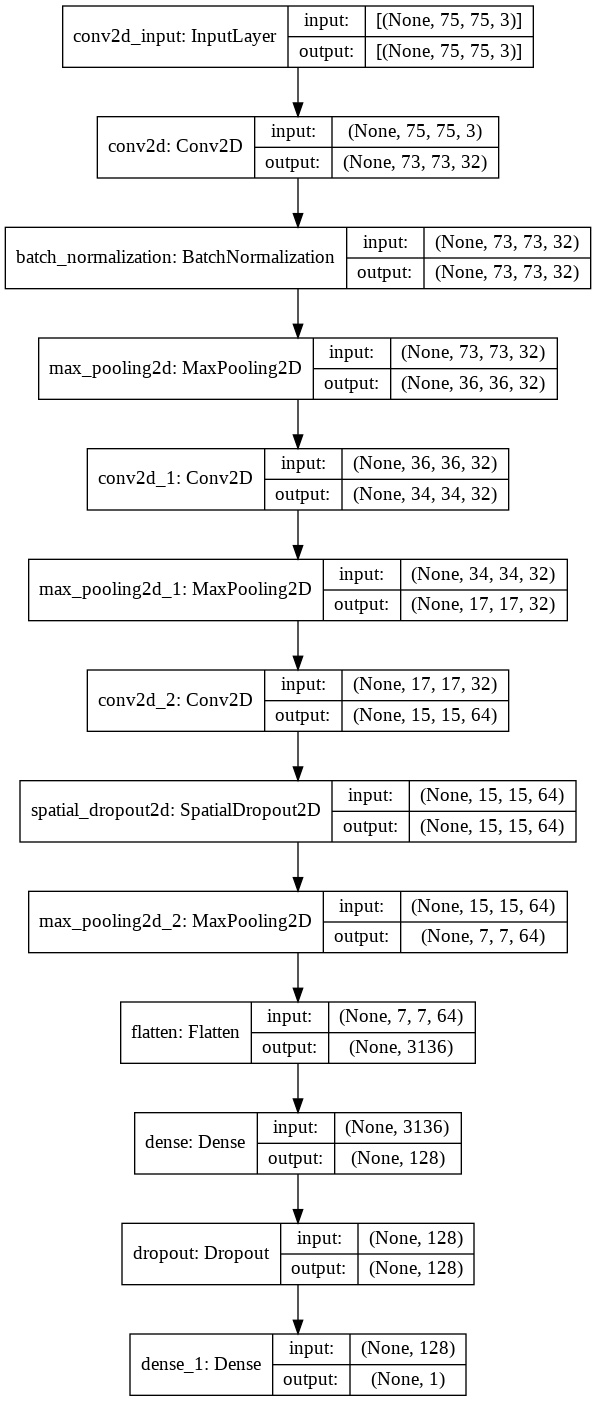

In [ ]:
plot_model(cnn, to_file='CNN_model.png', show_layer_names = True , show_shapes = True)

In [ ]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

CNN_model = cnn.fit(training_set, epochs = 50, validation_data = validation_set, callbacks = cb)


Epoch 1/50
208/208 [==============================] - 46s 82ms/step - loss: 0.6507 - accuracy: 0.6383 - val_loss: 0.6503 - val_accuracy: 0.6242
Epoch 2/50
208/208 [==============================] - 17s 83ms/step - loss: 0.5753 - accuracy: 0.7013 - val_loss: 0.5794 - val_accuracy: 0.7205
Epoch 3/50
208/208 [==============================] - 17s 80ms/step - loss: 0.5181 - accuracy: 0.7447 - val_loss: 0.5032 - val_accuracy: 0.7666
Epoch 4/50
208/208 [==============================] - 17s 83ms/step - loss: 0.4970 - accuracy: 0.7671 - val_loss: 0.4820 - val_accuracy: 0.7693
Epoch 5/50
208/208 [==============================] - 17s 81ms/step - loss: 0.4671 - accuracy: 0.7845 - val_loss: 0.4248 - val_accuracy: 0.8060
Epoch 6/50
208/208 [==============================] - 17s 80ms/step - loss: 0.4285 - accuracy: 0.8067 - val_loss: 0.4072 - val_accuracy: 0.8114
Epoch 7/50
208/208 [==============================] - 17s 80ms/step - loss: 0.4245 - accuracy: 0.8060 - val_loss: 0.3960 - val_accuracy:

# **Printing the accuracy on how well the model works on test and training sets.**

In [ ]:
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

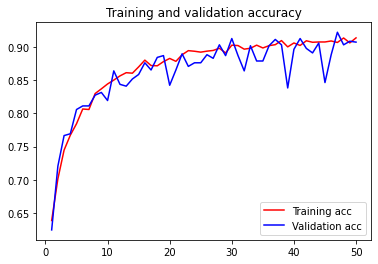

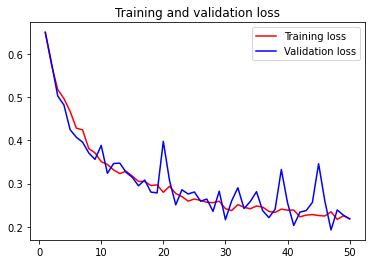

In [ ]:
acc = CNN_model.history['accuracy']
val_acc = CNN_model.history['val_accuracy']
loss = CNN_model.history['loss']
val_loss = CNN_model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
score_CNN = cnn.evaluate(test_set)
print("Test Loss:", score_CNN[0])
print("Test Accuracy:", score_CNN[1])

58/58 [==============================] - 1s 19ms/step - loss: 0.1592 - accuracy: 0.9376
Test Loss: 0.1592121422290802
Test Accuracy: 0.937635600566864


In [ ]:
y_pred_CNN = cnn.predict(test_set)
y_pred_CNN = np.round(y_pred_CNN)

print("The recall score of this model is {}".format(recall_score(y_test, y_pred_CNN)))
print("The precision score of the model is {}".format(precision_score(y_test, y_pred_CNN)))
print("The F1 score of the model is {}".format(f1_score(y_test, y_pred_CNN)))
print("The roc auc score of the model is {}".format(roc_auc_score(y_test, y_pred_CNN)))

The recall score of this model is 0.9369544131910766
The precision score of the model is 0.9507874015748031
The F1 score of the model is 0.9438202247191012
The roc auc score of the model is 0.9377268990924632


In [ ]:
print(classification_report(y_test, y_pred_CNN))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       813
           1       0.95      0.94      0.94      1031

    accuracy                           0.94      1844
   macro avg       0.94      0.94      0.94      1844
weighted avg       0.94      0.94      0.94      1844



## Checking the prediction along the figures 

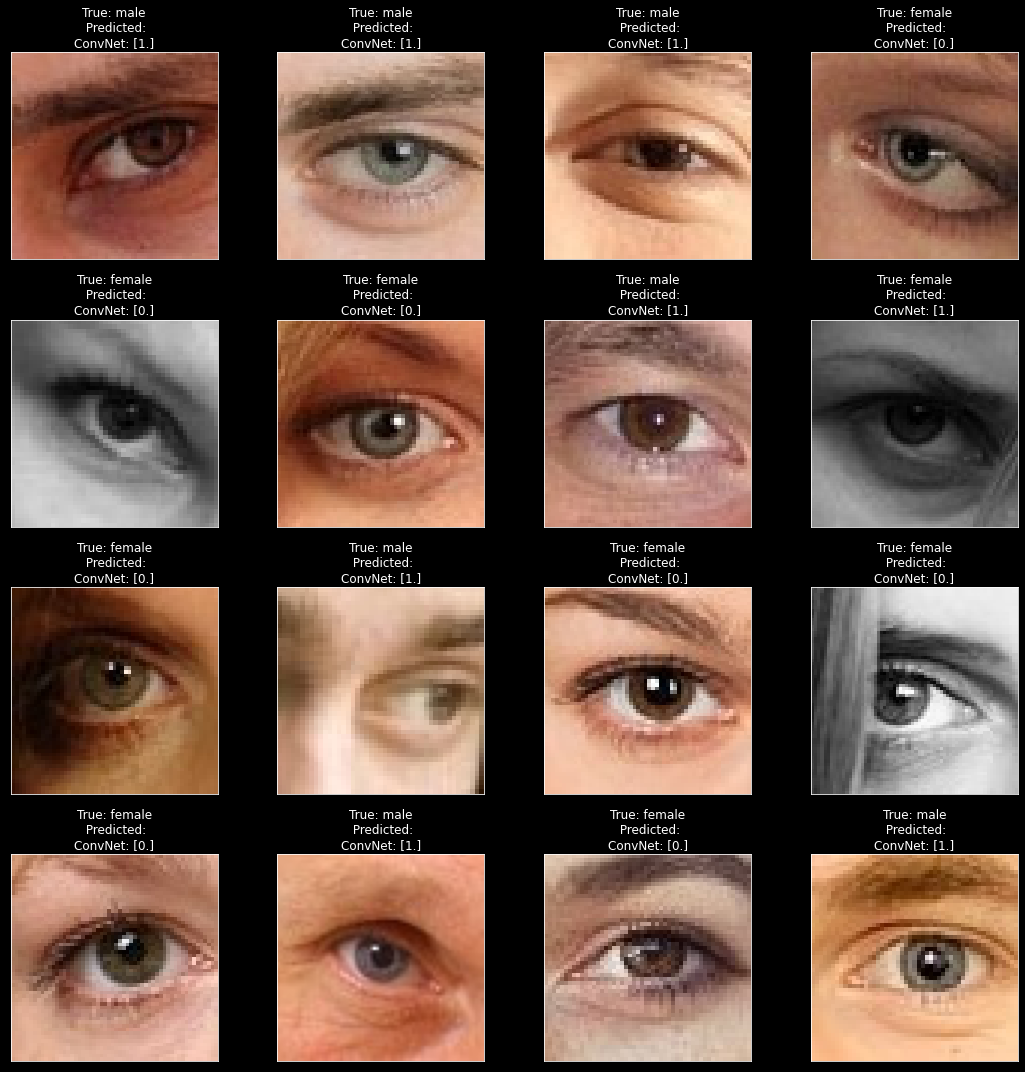

In [ ]:
plt.style.use("dark_background")


fig, axes = plt.subplots(nrows = 4,
                         ncols = 4,
                         figsize = (15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_test["filepaths"].iloc[i]))
    ax.set_title(f"True: {X_test.label.iloc[i]}\n Predicted:\nConvNet: {y_pred_CNN[i]}")
plt.tight_layout()
plt.show()

# **Loading the Testing set**

In [ ]:
!pip install cv
import pandas as pd
import cv

names = pd.read_csv("/content/content/eye_gender_data/Testing_set.csv") # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/test/' + fname] for fname in names['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_data = pd.merge(images, names, how = 'inner', on = 'filename')

test_data_set = [] # initialize an empty numpy array
image_size = 75 # image size taken is 100 here. one can take other size too
for i in range(len(test_data)):
  img_array_1 = cv2.imread(test_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to 
  new_img_array_2 = cv2.resize(img_array_1, (image_size, image_size)) # resizing the image array
  color_img = cv2.cvtColor(new_img_array_2, cv2.COLOR_GRAY2RGB) 
  test_data_set.append([color_img,test_data['filename'][i]])

ERROR:root:Error disabling cv.imshow().
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_import_hooks/_cv2.py", line 86, in load_module
    cv_module.imshow,
AttributeError: module 'cv' has no attribute 'imshow'


#**Preprocessing the test data**

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    dataframe = test_data,
    x_col = "filepaths",
    y_col = None,
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = None,
    batch_size = 32,
    shuffle = False,

)

Found 2305 validated image filenames.


#**Predicting the model on the testing set**

In [ ]:
cnn.predict(test_generator)

array([[0.99995875],
       [0.15223539],
       [0.9065614 ],
       ...,
       [0.9999262 ],
       [0.99999404],
       [0.98443097]], dtype=float32)

In [ ]:
y=np.round(cnn.predict(test_generator))

In [ ]:
prediction=pd.DataFrame(y,columns=['label'])

In [ ]:
prediction.value_counts()

label
1.0      1250
0.0      1055
dtype: int64

In [ ]:
new=[]
for i in y:
  if i==1:
    new.append('male')
  else:
    new.append('female')

In [ ]:
data_predicted_new=pd.DataFrame(new,columns=['Predicted data'])

In [ ]:
new

['male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 '

In [ ]:
data_predicted=pd.DataFrame(new,columns=['Predicted data'])

In [ ]:
data_predicted

,Predicted data
0,male
1,female
2,male
3,male
4,male
...,...
2300,female
2301,female
2302,male
2303,male


In [ ]:
data_predicted.value_counts()

Predicted data
male              1250
female            1055
dtype: int64

# **Downloading the CSV file after converting it into CSV**

In [ ]:
res = pd.DataFrame({'filename': test_data['filename'], 'label': data_predicted['Predicted data']}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission.csv')#downlaoding the file locally

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>